# 🚀 **Kickstarter Campaigns 2009 - 2017: <br /> Understanding & Predicting Success**
============================================================ <br />
Jessica Gunther
## 📊 Dataset
* Kaggle: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv
* 370K + kickstarter campaign records over eight years

## ✅ Outline of Analysis:
* **Phase 1: Preprocessing**
    * Understanding of dataframe, attributes and missing values
    * Creation of new attributes where necessary and/or beneficial to analysis
    * Review of summary statistics
* **Phase 2: Visualization**
    * Understanding attribute relationships, distributions and occurrences using matplotlib
* **Phase 3: Association Rule Mining**
    * Identifying strong associations in the dataset using Apriori 
    * Further supporting previous visualization section
* **Phase 4: Classification Model**
    * Build classification model using sklearn
    * Identify right combination of attributes that leads to highest accuracy
* **Phase 5: Predicting New Campaign Instances**
    * Allows user to input new campaign info
    * Using classification model, program will tell user the likely outcome of the campaign
    * Possibly: provide association rules or tips to increase likelihood of success
* **Phase 6: Discussion**
    * Analysis applications and possible future work

## Phase 1: Preprocessing

In [68]:
#load data into pandas dataframe

import csv
importgithy pandas as pd

#import data into a dataframe and view

data = pd.read_csv('kickstarter.csv')

data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Review data types and identify columns with missing values

In [69]:
#remove ID attribute (not valuable for analysis)
data.pop('ID')

#get basic information such as number of rows, columns, data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   category          378661 non-null  object 
 2   main_category     378661 non-null  object 
 3   currency          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   goal              378661 non-null  float64
 6   launched          378661 non-null  object 
 7   pledged           378661 non-null  float64
 8   state             378661 non-null  object 
 9   backers           378661 non-null  int64  
 10  country           378661 non-null  object 
 11  usd pledged       374864 non-null  float64
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 40.4+ MB


In [70]:
#there are missing values in the name column (only 4)
#there are missing values in the usd pledged column
#the usd pledged column is the same as the usd_pledged_real column, 
#but they were converted using differnt APIs
#therefore, I'm going to delete the usd pledged column which
#is missing values

f = data.pop('usd pledged')

#since there are only 4 name values that are null and we will 
#remove the name attribute anyway before running any ML algos,
#I will leave those records for initial analysis and visualizations

### Adding attributes:
* month: month campaign started
* length: time of campaign
* year: year of campaign 
* percent_goal: % of goal reached
* avg_contribute: avg. contribution size per campaign 

In [71]:
#add start month attribute 
def getmonths(df, column):
    months = []
    for i in range(len(df)):
        date = df.loc[i, column]
        if date[5:7] == '01':
            months.append('Jan')
        if date[5:7] == '02':
            months.append('Feb')
        if date[5:7] == '03':
            months.append('Mar')
        if date[5:7] == '04':
            months.append('Apr')
        if date[5:7] == '05':
            months.append('May')
        if date[5:7] == '06':
            months.append('Jun')
        if date[5:7] == '07':
            months.append('Jul')
        if date[5:7] == '08':
            months.append('Aug')
        if date[5:7] == '09':
            months.append('Sept')
        if date[5:7] == '10':
            months.append('Oct')
        if date[5:7] == '11':
            months.append('Nov')
        if date[5:7] == '12':
            months.append('Dec')
    return months

months = getmonths(data, 'launched')
data['month'] = months
            

In [72]:
#add length of campaign and year attribute
import datetime as dt
from datetime import datetime, timedelta

lengths = []
years = []
for i in range(len(data)):
    start = data.loc[i, 'launched']
    end = data.loc[i, 'deadline'].replace('-', '')
    start = start.replace('-', '')
    end = end.replace('-', '')
    temp = start.split()
    start = str(temp[0])
    end = pd.to_datetime(end, format='%Y%m%d')
    start = pd.to_datetime(start, format='%Y%m%d')
    start = start.date()
    end = end.date()
    temp = str(start)
    year = temp[0:4]
    years.append(year)
    difference = end - start
    conv = str(difference)
    days = int(conv[0:2])
    lengths.append(days)

data['length'] = lengths
    

In [73]:
data['year'] = years

In [74]:
#I will remove 'pledged' and 'goal' since these are
#the same as the usd columns (just unconverted to usd)

data.pop('goal')
data.pop('pledged')

#rename remaining pledged and goal columns for simplicity and legibility 
data = data.rename(columns={'usd_pledged_real' : 'pledged', 'usd_goal_real': 'goal'})

In [76]:
#add % to goal and avg_contribute 

percents = []
averages = []
for i in range(len(data)):
    if data.loc[i, 'pledged'] < 1 or data.loc[i, 'goal'] < 1 or data.loc[i, 'backers'] < 1:
        percents.append(0)
        averages.append(0)
    else:
        goal = data.loc[i, 'goal']
        pledged = data.loc[i, 'pledged']
        backers = data.loc[i, 'backers']
        percent = round((pledged / goal) * 100)
        average = round(pledged/backers)
        percents.append(percent)
        averages.append(average)
        
    
data['percent_goal'] = percents
data['avg_contribute'] = averages

In [77]:
#drop records that show the year as 1970 (some sort of mistake in the dataset)

for i in range(len(data)):
    if data.loc[i, 'year'] == '1970':
        data = data.drop(i)

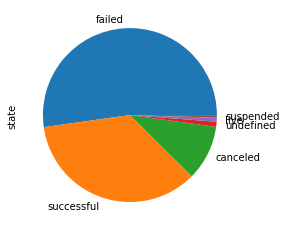

In [78]:
#Campaign state will be the class attribute, so I want to 
#see the distribution of states
import matplotlib.pyplot as plt

states = data['state'].value_counts()
display(states.plot(kind = 'pie'))

In [79]:
#because the vast majority of campaigns either failed or were successfule
#I am going to remove records with other outcome states (suspended, live, undefined, canceled)

data = data.drop(data[(data.state != 'successful') & (data.state != 'failed')].index)

### Reviewing summary statistics for each column

In [81]:
#function to output summary stats for numeric attributes
#and unique value counts for object attributes

def sum_stats(data, types):
    for i in range(len(types)):
        
        #do not want to include name, because each name value will be unique
        if types[i] == 'object' and types.index[i] != 'name':
            print('{}: object'.format(types.index[i]))
            print(data[types.index[i]].value_counts())
            print()
        if types[i] == 'int64' or types[i] == 'float64':
            print('{}: numeric'.format(types.index[i]))
            print(data[types.index[i]].describe())
            print()
            
data_types = data.dtypes
sum_stats(data, data_types)

category: object
Product Design     18680
Documentary        14523
Music              12633
Tabletop Games     11744
Shorts             11394
                   ...  
Residencies           68
Letterpress           46
Chiptune              33
Literary Spaces       19
Taxidermy             10
Name: category, Length: 159, dtype: int64

main_category: object
Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

currency: object
USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

deadline: object
2014-08-08    612


In [82]:
#descriptive statistics for numeric attributes
data.describe()

,backers,pledged,goal,length,percent_goal,avg_contribute
count,331675.000000,3.316750e+05,3.316750e+05,331675.000000,3.316750e+05,331675.000000
mean,116.381581,9.943461e+03,4.151000e+04,33.954875,3.420937e+02,66.083654
std,965.427268,9.673293e+04,1.108930e+06,12.713332,2.814949e+04,131.609984
min,0.000000,0.000000e+00,1.000000e-02,1.000000,0.000000e+00,0.000000
25%,2.000000,5.000000e+01,2.000000e+03,30.000000,1.000000e+00,17.000000
50%,15.000000,7.880000e+02,5.000000e+03,30.000000,2.000000e+01,42.000000
75%,63.000000,4.608000e+03,1.500000e+04,36.000000,1.090000e+02,78.000000
max,219382.000000,2.033899e+07,1.663614e+08,92.000000,1.042779e+07,10000.000000


* Average campaign length is 34 days
* Average goal is $\$$41,510
* Average pledged is 9,943
* Each campaign has an average of 116 backers
* Average contribution per campaign is 73

In [93]:
#writing cleaned data to another file (so I don't need to keep running above code)

outfile = open('clean_kickstarter.csv', 'w')
data.to_csv(outfile)

In [94]:
outfile.close()

## Phase Two: Data Visualizations

In [425]:
#load cleaned data into pandas dataframe

import csv
import pandas as pd
import matplotlib.pyplot as plt

#import data into a dataframe and view

data = pd.read_csv('clean_kickstarter.csv')
data.pop('Unnamed: 0')
data.pop('deadline')
data.pop('launched')

#some records have an erroneous country value, so I am removing those records
data = data.drop(data[(data.country == 'N,0"')].index)
data

,name,category,main_category,currency,state,backers,country,pledged,goal,month,length,year,percent_goal,avg_contribute
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,0,GB,0.0,1533.95,Aug,59,2015,0.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,15,US,2421.0,30000.00,Sept,60,2017,8.0,161.0
2,Where is Hank?,Narrative Film,Film & Video,USD,failed,3,US,220.0,45000.00,Jan,45,2013,0.0,73.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,1,US,1.0,5000.00,Mar,30,2012,0.0,1.0
4,Monarch Espresso Bar,Restaurants,Food,USD,successful,224,US,52375.0,50000.00,Feb,35,2016,105.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,failed,4,US,154.0,6500.00,Mar,30,2017,2.0,38.0
331671,The Tribe,Narrative Film,Film & Video,USD,failed,5,US,155.0,1500.00,Jun,27,2011,10.0,31.0
331672,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,failed,1,US,20.0,15000.00,Jul,46,2010,0.0,20.0
331673,BioDefense Education Kit,Technology,Technology,USD,failed,6,US,200.0,15000.00,Jan,31,2016,1.0,33.0


40% of campaigns were successful
60% of campaigns failed


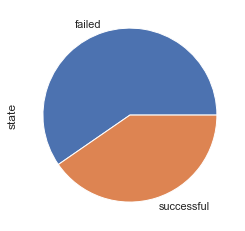

In [369]:
#visualizing counts of the different campaign states
states = data['state'].value_counts()
states.plot(kind='pie')

#calculating percentages of campaign states
failed = data[data.state == 'failed'].shape[0]
successful = data[data.state == 'successful'].shape[0]
p_failed = round((failed / (successful + failed)) * 100)
p_success = round((successful / (successful + failed)) * 100)
print('{}% of campaigns were successful\n{}% of campaigns failed'.format(p_success, p_failed))

* 40% of campaigns were successful
* 60% of campaigns failed

				Campaign Counts


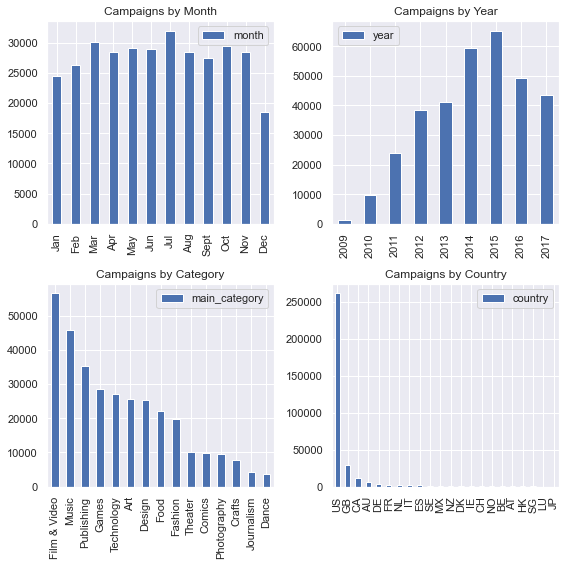

In [468]:
#figure to visualize distributions for relevant categorical attributes
import matplotlib.pyplot as plt
import seaborn as sns

#returns the counts per columns as a dataframe
def view_counts(column):
    if column == 'main_category' or column == 'country':
        holder = data[column].value_counts()
    if column == 'year' or column == 'month':    
        holder = data[column].value_counts(sort = False)
    holder = holder.to_frame()
    if column == 'month':
        holder = holder.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']) 
    index = holder.index
    return holder

cat = view_counts('main_category')
month = view_counts('month')
year = view_counts('year')
country = view_counts('country')

fig, name = plt.subplots(2,2, figsize=(8,8))
cat.plot(ax=name[1, 0], kind = 'bar', title = 'Campaigns by Category')
country.plot(ax=name[1, 1], kind = 'bar', title = 'Campaigns by Country')
month.plot(ax=name[0, 0], kind = 'bar', title ='Campaigns by Month')
year.plot(ax=name[0, 1], kind = 'bar', title = 'Campaigns by Year')
print('\t\t\t\tCampaign Counts')
print('=================='*4)
fig.tight_layout(pad=1.0)

* Film & Video is the most popular campaign category followed by Music and Publishing
* Vast majority of campaigns take place in the US
* Most popular month to host a campaign is in July
* The number of campaigns on kickstarter peaked in 2015 and then fell until 2017

		Numeric Attribute Distributions & Bins


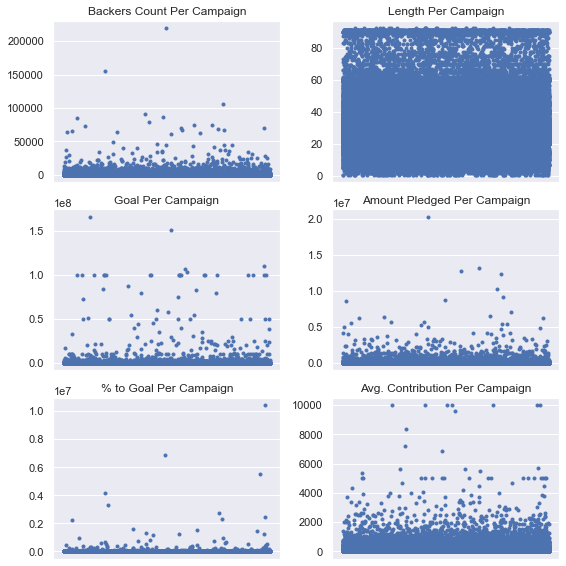

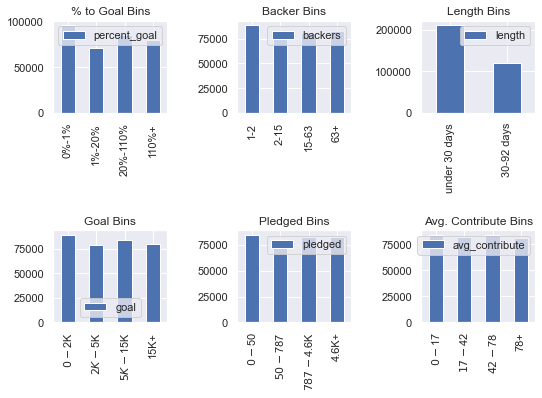

In [555]:
#figure to visualize distributions of relevant numerical attributes

backers = data['backers']
pledged = data['pledged']
goal = data['goal']
length = data['length']
p_goal = data['percent_goal']
avg_contribute = data['avg_contribute']

figure, numeric = plt.subplots(3,2, figsize=(8,8))
backers.plot(ax=numeric[0, 0], style = '.', title = 'Backers Count Per Campaign').set_xticks([])
length.plot(ax=numeric[0, 1], style = '.', title = 'Length Per Campaign').set_xticks([])
goal.plot(ax=numeric[1, 0], style = '.', title = 'Goal Per Campaign').set_xticks([])
pledged.plot(ax=numeric[1, 1], style = '.', title = 'Amount Pledged Per Campaign').set_xticks([])
p_goal.plot(ax=numeric[2, 0], style = '.', title = '% to Goal Per Campaign').set_xticks([])
avg_contribute.plot(ax=numeric[2, 1], style = '.', title = 'Avg. Contribution Per Campaign').set_xticks([])

print('\t\tNumeric Attribute Distributions & Bins')
print('=================='*4)
figure.tight_layout(pad=1.0)

#visualizing numeric attribute bins

backer_bins = pd.qcut(data['backers'],4, labels = ['1-2', '2-15', '15-63', '63+'])
b = backer_bins.value_counts(sort=False).to_frame()

p_goal_bins = pd.qcut(data['percent_goal'],4, labels = ['0%-1%', '1%-20%', '20%-110%', '110%+'])
p = p_goal_bins.value_counts(sort=False).to_frame()

length_bins = pd.qcut(data['length'], 2, labels = ['under 30 days', '30-92 days'])
c = length_bins.value_counts(sort=False).to_frame()

goal_bins = pd.qcut(data['goal'], 4, labels= ['$0-$2K', '$2K-$5K', '$5K-$15K', '15K+'])
g = goal_bins.value_counts(sort=False).to_frame()

pledged_bins = pd.qcut(data['pledged'], 4, labels = ['$0-$50', '$50-$787', '$787-$4.6K', '4.6K+'])
z = pledged_bins.value_counts(sort=False).to_frame()

avgc_bins = pd.qcut(data['avg_contribute'], 4, labels = ['$0-$17', '$17-$42', '$42-$78', '78+'])
k = avgc_bins.value_counts(sort=False).to_frame()


fig3, name = plt.subplots(2,3, figsize=(8,6))
p.plot(ax=name[0, 0], kind = 'bar', title = '% to Goal Bins')
b.plot(ax=name[0, 1], kind = 'bar', title = 'Backer Bins')
c.plot(ax=name[0, 2], kind = 'bar', title = 'Length Bins')
g.plot(ax=name[1, 0], kind = 'bar', title = 'Goal Bins')
z.plot(ax=name[1, 1], kind = 'bar', title = 'Pledged Bins')
k.plot(ax=name[1, 2], kind = 'bar', title = 'Avg. Contribute Bins')


fig3.tight_layout(pad=2.0)


* Vast majority of campaigns were under 30 days in length and the remaining were between 30 and 92 days in length
* The vast majority of campaigns have below 63 backers, but a few outliers
    had many more
* Most campaigns had a goal of under $\$$15K, but a few outliers had much higher goals
* Around half of campaigns raised 20% or less of their goal, while a few outliers far exceeded their goals
* Around half of campaigns raised under $\$$787, a fourth raised between $\$$787 and $\$$4.6K and another fourth raised above $\$$4.6K
* The average size of an individual contribtuon for most campaigns was under $\$$78

				States By Year and Month


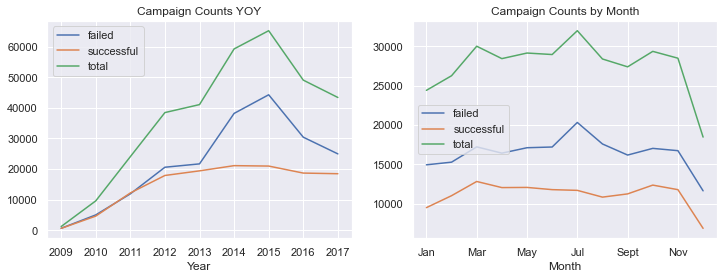

In [545]:
#show YOY states and month vs states

#YOY STATES
#counts the number of failed and successful campaigns per year
def year_counts(a):
    f = data[(data.state == 'failed') & (data.year == a)].shape[0]
    s = data[(data.state == 'successful') & (data.year == a)].shape[0]
    return f, s

#stores year counts into a dict
year_info = {}
for i in range(2009, 2018):
    q = str(i)
    b = year_counts(i)
    year_info[q] = b

#turns dict into a dataframe & renames the columns    
state_year = pd.DataFrame.from_dict(year_info, orient='index')
state_year = state_year.rename(columns={0:'failed',1:'successful'})
state_year = state_year.reset_index()

#adds total campaign count column to dataframe
totals = []
for i in range(len(state_year)):
    f = state_year.loc[i, 'failed']
    s = state_year.loc[i, 'successful']
    total = f + s
    totals.append(total)
state_year['total'] = totals
state_year = state_year.set_index('index')


#MONTH VS STATES
#counts failed and successful campaigns per month
def month_counts(a):
    f = data[(data.state == 'failed') & (data.month == a)].shape[0]
    s = data[(data.state == 'successful') & (data.month == a)].shape[0]
    return f, s

#creates dict to store month counts
month_info = {}
month_info['Jan'] = month_counts('Jan')
month_info['Feb'] = month_counts('Feb')
month_info['Mar'] = month_counts('Mar')
month_info['Apr'] = month_counts('Apr')
month_info['May'] = month_counts('May')
month_info['Jun'] = month_counts('Jun')
month_info['Jul'] = month_counts('Jul')
month_info['Aug'] = month_counts('Aug')
month_info['Sept'] = month_counts('Sept')
month_info['Oct'] = month_counts('Oct')
month_info['Nov'] = month_counts('Nov')
month_info['Dec'] = month_counts('Dec')

#turns dict into a dataframe and changes column names
state_month = pd.DataFrame.from_dict(month_info, orient='index')
state_month = state_month.rename(columns={0:'failed',1:'successful'})
state_month = state_month.reset_index()

#adds a total column to the month dataframe
totals = []
for i in range(len(state_month)):
    f = state_month.loc[i, 'failed']
    s = state_month.loc[i, 'successful']
    total = f + s
    totals.append(total)
state_month['total'] = totals
state_month = state_month.set_index('index')


print('\t\t\t\tStates By Year and Month')
print('=================='*5)

#creates subplot to view campaign state by YOY and by month
fig4, name = plt.subplots(1,2, figsize=(12,4))
state_year.plot(ax=name[0], kind = 'line', title = 'Campaign Counts YOY').set_xlabel('Year')
state_month.plot(ax=name[1], kind = 'line', title = 'Campaign Counts by Month').set_xlabel('Month')

#updates state by year table to include percentages of failed vs successful
state_year = state_year.reset_index()
p_failed = []
p_succeeded = []
for i in range(len(state_year)):
    failed = state_year.loc[i, 'failed']
    succ = state_year.loc[i, 'successful']
    total = failed + succ
    p_f = round((failed/total) * 100)
    p_s = round((succ/total) * 100)
    p_failed.append(p_f)
    p_succeeded.append(p_s)
state_year['%_failed'] = p_failed
state_year['%_success'] = p_succeeded

state_year = state_year.rename(columns={'index':'Year'})


* Up until 2011, failed and successful campaigns were growing at the same rate
* Starting 2013, the rate of failed campaigns grows significantly over successful campaigns
    until 2015, when the rate of failed campaigns trends down closer to the number of
    successful campaigns
* Overall campaign counts on the platform rises until 2015, after which time it starts to drop
* Successful campaigns peak in March 
* There is a peak in campaigns on the platform in July
* Campaigns launched in July have the lowest rate of success, while campaigns launched in March
    have the highest rate of success

Note: See dataframes of above line graphs below for raw numbers and percentages

In [541]:
#dataframes supporting above line graphs

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

state_month = state_month.reset_index()

#add percentage of success and fail to the month vs state dataframe
p_suc = []
p_fail = []
for i in range(len(state_month)):
    f = state_month.loc[i, 'failed']
    s = state_month.loc[i, 'successful']
    t = state_month.loc[i, 'total']
    p_s = round((s / t) * 100)
    p_f = round((f / t) * 100)
    p_suc.append(p_s)
    p_fail.append(p_f)

state_month['%_failed'] = p_fail  
state_month['%_success'] = p_suc
#state_month.pop('level_0')
state_month = state_month.rename(columns={'index': 'month'})
multi_table([state_year, state_month])

,Year,failed,successful,total,%_failed,%_success
0,2009,600,579,1179,51.0,49.0
1,2010,4984,4593,9577,52.0,48.0
2,2011,11878,12171,24049,49.0,51.0
3,2012,20588,17892,38480,54.0,46.0
4,2013,21686,19402,41088,53.0,47.0
5,2014,38199,21106,59305,64.0,36.0
6,2015,44301,20971,65272,68.0,32.0
7,2016,30421,18675,49096,62.0,38.0
8,2017,24957,18462,43419,57.0,43.0
,month,failed,successful,total,%_failed,%_success


In [547]:
#TODO
#visualize: length vs state, backers vs state, category vs state, avg. contribute vs state, 
#backers vs category, avg. contribute vs category

## Phase Three: Association Rule Mining

In [648]:
#making data set suitable for apriori 

#make a copy of the dataframe 
ap_data = data.copy()

#remove attributes name, main_category, currency, pledged and % goal(not good for apriori)
ap_data.pop('name')
ap_data.pop('main_category')
ap_data.pop('currency')
ap_data.pop('pledged')
ap_data.pop('percent_goal')
ap_data

,category,state,backers,country,goal,month,length,year,avg_contribute
0,Poetry,failed,0,GB,1533.95,Aug,59,2015,0.0
1,Narrative Film,failed,15,US,30000.00,Sept,60,2017,161.0
2,Narrative Film,failed,3,US,45000.00,Jan,45,2013,73.0
3,Music,failed,1,US,5000.00,Mar,30,2012,1.0
4,Restaurants,successful,224,US,50000.00,Feb,35,2016,234.0
...,...,...,...,...,...,...,...,...,...
331670,Small Batch,failed,4,US,6500.00,Mar,30,2017,38.0
331671,Narrative Film,failed,5,US,1500.00,Jun,27,2011,31.0
331672,Narrative Film,failed,1,US,15000.00,Jul,46,2010,20.0
331673,Technology,failed,6,US,15000.00,Jan,31,2016,33.0


In [649]:
#convert years to a string
years = ap_data['year']
years = [str(int) for int in years]
ap_data['year'] = years

#discretize backers
ap_data['backers'] = backer_bins
ap_data['goal'] = goal_bins
ap_data['length'] = length_bins
ap_data['avg_contribute'] = avgc_bins

ap_data

,category,state,backers,country,goal,month,length,year,avg_contribute
0,Poetry,failed,1-2,GB,$0-$2K,Aug,30-92 days,2015,$0-$17
1,Narrative Film,failed,2-15,US,15K+,Sept,30-92 days,2017,78+
2,Narrative Film,failed,2-15,US,15K+,Jan,30-92 days,2013,$42-$78
3,Music,failed,1-2,US,$2K-$5K,Mar,under 30 days,2012,$0-$17
4,Restaurants,successful,63+,US,15K+,Feb,30-92 days,2016,78+
...,...,...,...,...,...,...,...,...,...
331670,Small Batch,failed,2-15,US,$5K-$15K,Mar,under 30 days,2017,$17-$42
331671,Narrative Film,failed,2-15,US,$0-$2K,Jun,under 30 days,2011,$17-$42
331672,Narrative Film,failed,1-2,US,$5K-$15K,Jul,30-92 days,2010,$17-$42
331673,Technology,failed,2-15,US,$5K-$15K,Jan,30-92 days,2016,$17-$42


In [650]:
import numpy as np
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules 

#turn data into binary
ap_data = pd.get_dummies(ap_data)

#running apriori
frq_items = apriori(ap_data, min_support = .05, use_colnames = True)
rules = association_rules(frq_items, metric = 'lift', min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])


In [652]:
#filter rules by class association

#convert consequents to string
cons = rules['consequents']
cons = [str(con) for con in cons]
rules['consequents'] = cons

filtered = pd.DataFrame()
for i in range(len(rules)):
    a = str(rules.loc[i, 'consequents'])
    if a == "frozenset({\'state_successful\'})" or a == "frozenset({\'state_failed\'})":
        if rules.loc[i, 'confidence'] >= .70:
            filtered = filtered.append(rules.loc[i])
            
filtered = filtered[['antecedents', 'consequents','confidence', 'antecedent support', 'consequent support', 'support', 'lift', 'leverage']]


In [668]:
#showing only class association rules with confidence >= to .70

filtered= filtered.sort_values(by=['confidence'], ascending=False)
filtered.style

,antecedents,consequents,confidence,antecedent support,consequent support,support,lift,leverage
1006,"frozenset({'backers_1-2', 'goal_15K+', 'avg_contribute_$0-$17'})",frozenset({'state_failed'}),1.000000,0.053333,0.596184,0.053333,1.677336,0.021537
922,"frozenset({'backers_1-2', 'goal_15K+', 'country_US'})",frozenset({'state_failed'}),1.000000,0.051496,0.596184,0.051496,1.677336,0.020795
206,"frozenset({'backers_1-2', 'goal_15K+'})",frozenset({'state_failed'}),1.000000,0.071706,0.596184,0.071706,1.677336,0.028956
202,"frozenset({'backers_1-2', 'goal_$5K-$15K'})",frozenset({'state_failed'}),0.999900,0.060405,0.596184,0.060399,1.677168,0.024386
198,"frozenset({'backers_1-2', 'goal_$2K-$5K'})",frozenset({'state_failed'}),0.999435,0.058706,0.596184,0.058673,1.676387,0.023673
358,"frozenset({'goal_15K+', 'avg_contribute_$0-$17'})",frozenset({'state_failed'}),0.999144,0.063421,0.596184,0.063367,1.675899,0.025556
257,"frozenset({'goal_15K+', 'backers_2-15'})",frozenset({'state_failed'}),0.999094,0.053264,0.596184,0.053215,1.675816,0.021460
1048,"frozenset({'backers_1-2', 'avg_contribute_$0-$17', 'length_30-92 days'})",frozenset({'state_failed'}),0.998134,0.061427,0.596184,0.061313,1.674205,0.024691
1061,"frozenset({'backers_1-2', 'avg_contribute_$0-$17', 'year_2015'})",frozenset({'state_failed'}),0.997704,0.057810,0.596184,0.057677,1.673484,0.023212
966,"frozenset({'backers_1-2', 'avg_contribute_$0-$17', 'country_US'})",frozenset({'state_failed'}),0.996955,0.145623,0.596184,0.145180,1.672227,0.058362


### Duscussion of Apriori Results:


## Phase Six: Duscussion
* Data on campaign marketing (what channels, how much plan to be spent)
* Data on whether backers were in network of founders
* Data on page views, conversion
* Data on time dispersion of backers (what it means if you get lots of backers early on)
* Classification of quality of campaign page (how does campaign page appear?)
* K-means clustering to look at differnt sub-classes
